#Importing libraries

In [ ]:
import os
import shutil
import random
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
import cv2
import seaborn as sns
import pickle
import json

#Data Loading

In [ ]:
# make your own copy https://drive.google.com/file/d/1JDaLow_DTlaDZLhSbLLAL5OtDq7gBCw_/view?usp=sharing

!tar -xvf /content/drive/MyDrive/prodigy_Task5_trials/food-recognition-2022-DatasetNinja.tar -C /content/


Streaming output truncated to the last 5000 lines.
test/img/155886.jpg
test/img/131719.jpg
test/img/140859.jpg
test/img/124003.jpg
test/img/123669.jpg
test/img/159100.jpg
test/img/143588.jpg
test/img/161363.jpg
test/img/159783.jpg
test/img/178690.jpg
test/img/120397.jpg
test/img/164397.jpg
test/img/162745.jpg
test/img/150348.jpg
test/img/168034.jpg
test/img/124005.jpg
test/img/107187.jpg
test/img/161777.jpg
test/img/106060.jpg
test/img/162144.jpg
test/img/127977.jpg
test/img/042470.jpg
test/img/140098.jpg
test/img/172405.jpg
test/img/124335.jpg
test/img/111067.jpg
test/img/121040.jpg
test/img/112935.jpg
test/img/156350.jpg
test/img/086714.jpg
test/img/133618.jpg
test/img/164579.jpg
test/img/148767.jpg
test/img/113187.jpg
test/img/134650.jpg
test/img/085639.jpg
test/img/105373.jpg
test/img/176951.jpg
test/img/152267.jpg
test/img/111685.jpg
test/img/167899.jpg
test/img/139034.jpg
test/img/117361.jpg
test/img/124962.jpg
test/img/046389.jpg
test/img/164433.jpg
test/img/176515.jpg
test/img/

#Data Exploration

##Number of images per mode

In [ ]:
groups = ['training','validation','test']
for group in groups:
  print(f'{group} images :'+str(len(os.listdir(f'/content/{group}/img'))) , f'{group}annotation files :'+str(len(os.listdir(f'/content/{group}/ann'))) , sep='\n')

training images :39962
trainingannotation files :39962
validation images :1000
validationannotation files :1000
test images :3000
testannotation files :3000


##Images and Json files Overview

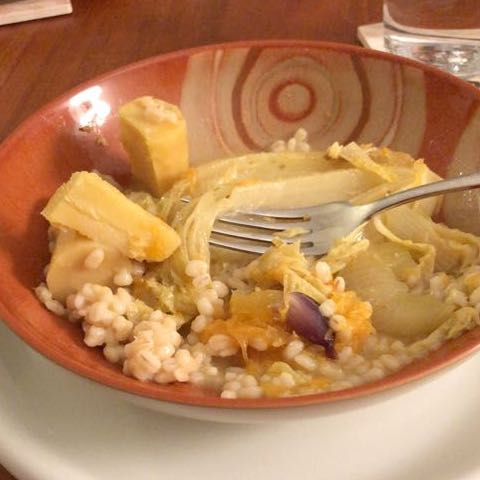

In [ ]:
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/training/img/007162.jpg')
cv2_imshow(img)

In [ ]:

with open('/content/training/ann/007162.jpg.json', 'r') as f:
  data = json.load(f)

for i in range(len(data['objects'])):
  print(data['objects'][i]['classTitle'])


curry-vegetarian


##Annotations Overview

In [ ]:
points = data['objects'][0]['points']['exterior'][:20]

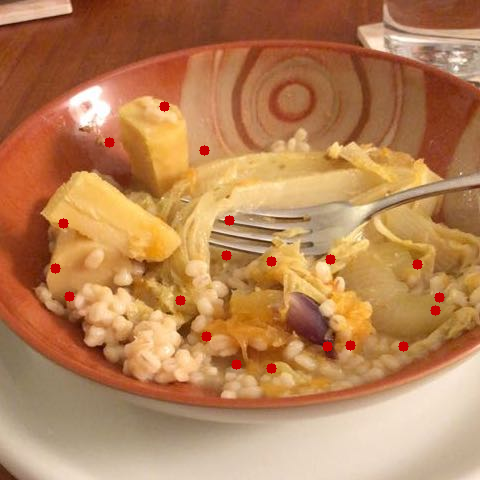

In [ ]:
# prompt: use the list points to draw the points on a copy the image img and show it

img_copy = img.copy()
for point in points:
  cv2.circle(img_copy, point, 5, (000, 00, 200), -1)
cv2_imshow(img_copy)


#'Classes' file creation (Yolo Format)

In [ ]:
with open('/content/meta.json', 'r') as f:
  meta = json.load(f)

index_classes = {}
i = 0
for classe in meta['classes']:
  index_classes[i] = ( classe['id'] , classe['title'])
  i += 1

print(index_classes)

{0: (3415, 'bread-wholemeal'), 1: (3417, 'jam'), 2: (3419, 'water'), 3: (3421, 'bread-sourdough'), 4: (3423, 'banana'), 5: (3425, 'soft-cheese'), 6: (3427, 'ham-raw'), 7: (3429, 'hard-cheese'), 8: (3431, 'cottage-cheese'), 9: (3433, 'bread-half-white'), 10: (3435, 'coffee-with-caffeine'), 11: (3437, 'fruit-salad'), 12: (3439, 'pancakes'), 13: (3441, 'tea'), 14: (3443, 'salmon-smoked'), 15: (3445, 'avocado'), 16: (3447, 'spring-onion-scallion'), 17: (3449, 'ristretto-with-caffeine'), 18: (3451, 'ham'), 19: (3453, 'egg'), 20: (3455, 'bacon-frying'), 21: (3457, 'chips-french-fries'), 22: (3459, 'juice-apple'), 23: (3461, 'chicken'), 24: (3463, 'tomato-raw'), 25: (3465, 'broccoli'), 26: (3467, 'shrimp-boiled'), 27: (3469, 'beetroot-steamed-without-addition-of-salt'), 28: (3471, 'carrot-raw'), 29: (3473, 'chickpeas'), 30: (3475, 'french-salad-dressing'), 31: (3477, 'pasta-hornli'), 32: (3479, 'sauce-cream'), 33: (3481, 'meat-balls'), 34: (3483, 'pasta'), 35: (3485, 'tomato-sauce'), 36: (348

In [ ]:
len(index_classes)

498

In [ ]:
with open('/content/classes.txt', 'w') as f:
  for i in range(len(index_classes)):
    f.write(index_classes[i][1]+'\n')

#Annotation files creation (Yolo Format)

In [ ]:
id_classes = {}
for ind in index_classes:
  id_classes[index_classes[ind][0]] = ind

print(id_classes)

{3415: 0, 3417: 1, 3419: 2, 3421: 3, 3423: 4, 3425: 5, 3427: 6, 3429: 7, 3431: 8, 3433: 9, 3435: 10, 3437: 11, 3439: 12, 3441: 13, 3443: 14, 3445: 15, 3447: 16, 3449: 17, 3451: 18, 3453: 19, 3455: 20, 3457: 21, 3459: 22, 3461: 23, 3463: 24, 3465: 25, 3467: 26, 3469: 27, 3471: 28, 3473: 29, 3475: 30, 3477: 31, 3479: 32, 3481: 33, 3483: 34, 3485: 35, 3487: 36, 3489: 37, 3491: 38, 3493: 39, 3495: 40, 3497: 41, 3499: 42, 3501: 43, 3503: 44, 3505: 45, 3507: 46, 3509: 47, 3511: 48, 3513: 49, 3515: 50, 3517: 51, 3519: 52, 3521: 53, 3523: 54, 3525: 55, 3527: 56, 3529: 57, 3531: 58, 3533: 59, 3535: 60, 3537: 61, 3539: 62, 3541: 63, 3543: 64, 3545: 65, 3547: 66, 3549: 67, 3551: 68, 3553: 69, 3555: 70, 3557: 71, 3559: 72, 3561: 73, 3563: 74, 3565: 75, 3567: 76, 3569: 77, 3571: 78, 3573: 79, 3575: 80, 3577: 81, 3579: 82, 3581: 83, 3583: 84, 3585: 85, 3587: 86, 3589: 87, 3591: 88, 3593: 89, 3595: 90, 3597: 91, 3599: 92, 3601: 93, 3603: 94, 3605: 95, 3607: 96, 3609: 97, 3611: 98, 3613: 99, 3615: 100

##Create 'annotations' folder in each mode

In [ ]:
directories = ['training', 'validation', 'test']
base_path = '/content'

for directory in directories:
  annotation_dir = os.path.join(base_path, directory, 'annotations')
  os.makedirs(annotation_dir, exist_ok=True)

##Annotations as txt files

In [ ]:
#Iterating over training and validation data
for directory in directories[:-1]:
  dir = f'/content/{directory}/'
  #iterating for each annotation json file
  for ann in os.listdir(os.path.join(dir,'ann')):
    with open(os.path.join(dir,'ann',ann), 'r') as f:
      data = json.load(f)             #saving json in a variable to fetch data from
      num_food = len(data['objects']) #number of food in the image


    #creating a txt annotation file for each img
    with open(os.path.join(dir, 'annotations',f'{ann[:-9]}.txt'), 'w') as h:
      for i in range(num_food):
        h.write(str(id_classes[data['objects'][i]['classId']]) + ' ')      #Start with a number representing the class
        points = data['objects'][i]['points']['exterior']           #Saving the points in a list variable to avoid iterations in the next nested loop
        num_points = len(points)
        size = data['size']
        width = size['width']
        height = size['height']

        for j in range(num_points):
          h.write(str(round(points[j][0]/width , 6)) + ' ' + str(round(points[j][1]/height , 6)) + ' ')
        if i != num_food-1:  #Avoiding an escape at the end of the file
          h.write('\n')




##Dataset Format Transformation

In [ ]:
!mkdir -p ./my_data/images
!mkdir  ./my_data/labels


shutil.move("./training/img/", "./my_data/images/")
os.rename("./my_data/images/img/", "./my_data/images/train/")

shutil.move("./training/annotations/", "./my_data/labels/")
os.rename("./my_data/labels/annotations/", "./my_data/labels/train/")

shutil.move("./validation/img/", "./my_data/images/")
os.rename("./my_data/images/img/", "./my_data/images/val")

shutil.move("./validation/annotations/", "./my_data/labels/")
os.rename("./my_data/labels/annotations/", "./my_data/labels/val/")


shutil.move("./classes.txt", "./my_data/")

'./my_data/classes.txt'

##Saving the annotations

In [ ]:
#Zipping the annotations in order to download them

!zip -r /content/val_annotations.zip /content/validation/annotations
!zip -r /content/train_annotations.zip /content/training/annotations


	zip warning: name not matched: /content/validation/annotations

zip error: Nothing to do! (try: zip -r /content/val_annotations.zip . -i /content/validation/annotations)
	zip warning: name not matched: /content/training/annotations

zip error: Nothing to do! (try: zip -r /content/train_annotations.zip . -i /content/training/annotations)


#Modeling

In [ ]:
from IPython.display import clear_output
!pip install ultralytics

clear_output()


##Create a YAML file

In [ ]:
#Creating a list from the file classes.txt

with open('./my_data/classes.txt', 'r') as f:
  classes = [line.strip() for line in f]
print(classes)


['bread-wholemeal', 'jam', 'water', 'bread-sourdough', 'banana', 'soft-cheese', 'ham-raw', 'hard-cheese', 'cottage-cheese', 'bread-half-white', 'coffee-with-caffeine', 'fruit-salad', 'pancakes', 'tea', 'salmon-smoked', 'avocado', 'spring-onion-scallion', 'ristretto-with-caffeine', 'ham', 'egg', 'bacon-frying', 'chips-french-fries', 'juice-apple', 'chicken', 'tomato-raw', 'broccoli', 'shrimp-boiled', 'beetroot-steamed-without-addition-of-salt', 'carrot-raw', 'chickpeas', 'french-salad-dressing', 'pasta-hornli', 'sauce-cream', 'meat-balls', 'pasta', 'tomato-sauce', 'cheese', 'pear', 'cashew-nut', 'almonds', 'lentils', 'mixed-vegetables', 'peanut-butter', 'apple', 'blueberries', 'cucumber', 'cocoa-powder', 'greek-yaourt-yahourt-yogourt-ou-yoghourt', 'maple-syrup-concentrate', 'buckwheat-grain-peeled', 'butter', 'herbal-tea', 'mayonnaise', 'soup-vegetable', 'wine-red', 'wine-white', 'green-bean-steamed-without-addition-of-salt', 'sausage', 'pizza-margherita-baked', 'salami', 'mushroom', 'b

In [ ]:
len(classes)

498

In [ ]:
%%writefile /content/my_data/data.yaml

path: /content/my_data
train: images/train/
val: images/val/
nc: 498
names: ['bread-wholemeal', 'jam', 'water', 'bread-sourdough', 'banana', 'soft-cheese', 'ham-raw', 'hard-cheese', 'cottage-cheese', 'bread-half-white', 'coffee-with-caffeine', 'fruit-salad', 'pancakes', 'tea', 'salmon-smoked', 'avocado', 'spring-onion-scallion', 'ristretto-with-caffeine', 'ham', 'egg', 'bacon-frying', 'chips-french-fries', 'juice-apple', 'chicken', 'tomato-raw', 'broccoli', 'shrimp-boiled', 'beetroot-steamed-without-addition-of-salt', 'carrot-raw', 'chickpeas', 'french-salad-dressing', 'pasta-hornli', 'sauce-cream', 'meat-balls', 'pasta', 'tomato-sauce', 'cheese', 'pear', 'cashew-nut', 'almonds', 'lentils', 'mixed-vegetables', 'peanut-butter', 'apple', 'blueberries', 'cucumber', 'cocoa-powder', 'greek-yaourt-yahourt-yogourt-ou-yoghourt', 'maple-syrup-concentrate', 'buckwheat-grain-peeled', 'butter', 'herbal-tea', 'mayonnaise', 'soup-vegetable', 'wine-red', 'wine-white', 'green-bean-steamed-without-addition-of-salt', 'sausage', 'pizza-margherita-baked', 'salami', 'mushroom', 'bread-meat-substitute-lettuce-sauce', 'tart', 'tea-verveine', 'rice', 'white-coffee-with-caffeine', 'linseeds', 'sunflower-seeds', 'ham-cooked', 'bell-pepper-red-raw', 'zucchini', 'green-asparagus', 'tartar-sauce', 'lye-pretzel-soft', 'cucumber-pickled', 'curry-vegetarian', 'yaourt-yahourt-yogourt-ou-yoghourt-natural', 'soup-of-lentils-dahl-dhal', 'soup-cream-of-vegetables', 'balsamic-vinegar', 'salmon', 'salt-cake-vegetables-filled', 'bacon', 'orange', 'pasta-noodles', 'cream', 'cake-chocolate', 'pasta-spaghetti', 'black-olives', 'parmesan', 'spaetzle', 'salad-lambs-ear', 'salad-leaf-salad-green', 'potatoes-steamed', 'white-cabbage', 'halloumi', 'beetroot-raw', 'bread-grain', 'applesauce-unsweetened-canned', 'cheese-for-raclette', 'mushrooms', 'bread-white', 'curds-natural-with-at-most-10-fidm', 'bagel-without-filling', 'quiche-with-cheese-baked-with-puff-pastry', 'soup-potato', 'bouillon-vegetable', 'beef-sirloin-steak', 'taboule-prepared-with-couscous', 'eggplant', 'bread', 'turnover-with-meat-small-meat-pie-empanadas', 'mungbean-sprouts', 'mozzarella', 'pasta-penne', 'lasagne-vegetable-prepared', 'mandarine', 'kiwi', 'french-beans', 'tartar-meat', 'spring-roll-fried', 'pork-chop', 'caprese-salad-tomato-mozzarella', 'leaf-spinach', 'roll-of-half-white-or-white-flour-with-large-void', 'pasta-ravioli-stuffing', 'omelette-plain', 'tuna', 'dark-chocolate', 'sauce-savoury', 'dried-raisins', 'ice-tea', 'kaki', 'macaroon', 'smoothie', 'crepe-plain', 'chicken-nuggets', 'chili-con-carne-prepared', 'veggie-burger', 'cream-spinach', 'cod', 'chinese-cabbage', 'hamburger-bread-meat-ketchup', 'soup-pumpkin', 'sushi', 'chestnuts', 'coffee-decaffeinated', 'sauce-soya', 'balsamic-salad-dressing', 'pasta-twist', 'bolognaise-sauce', 'leek', 'fajita-bread-only', 'potato-gnocchi', 'beef-cut-into-stripes-only-meat', 'rice-noodles-vermicelli', 'tea-ginger', 'tea-green', 'bread-whole-wheat', 'onion', 'garlic', 'hummus', 'pizza-with-vegetables-baked', 'beer', 'glucose-drink-50g', 'chicken-wing', 'ratatouille', 'peanut', 'high-protein-pasta-made-of-lentils-peas', 'cauliflower', 'quiche-with-spinach-baked-with-cake-dough', 'green-olives', 'brazil-nut', 'eggplant-caviar', 'bread-pita', 'pasta-wholemeal', 'sauce-pesto', 'oil', 'couscous', 'sauce-roast', 'prosecco', 'crackers', 'bread-toast', 'shrimp-prawn-small', 'panna-cotta', 'romanesco', 'water-with-lemon-juice', 'espresso-with-caffeine', 'egg-scrambled-prepared', 'juice-orange', 'ice-cubes', 'braided-white-loaf', 'emmental-cheese', 'croissant-wholegrain', 'hazelnut-chocolate-spread-nutella-ovomaltine-caotina', 'tomme', 'water-mineral', 'hazelnut', 'bacon-raw', 'bread-nut', 'black-forest-tart', 'soup-miso', 'peach', 'figs', 'beef-filet', 'mustard-dijon', 'rice-basmati', 'mashed-potatoes-prepared-with-full-fat-milk-with-butter', 'dumplings', 'pumpkin', 'swiss-chard', 'red-cabbage', 'spinach-raw', 'naan-indien-bread', 'chicken-curry-cream-coconut-milk-curry-spices-paste', 'crunch-muesli', 'biscuits', 'bread-french-white-flour', 'meatloaf', 'fresh-cheese', 'honey', 'vegetable-mix-peas-and-carrots', 'parsley', 'brownie', 'dairy-ice-cream', 'tea-black', 'carrot-cake', 'fish-fingers-breaded', 'salad-dressing', 'dried-meat', 'chicken-breast', 'mixed-salad-chopped-without-sauce', 'feta', 'praline', 'tea-peppermint', 'walnut', 'potato-salad-with-mayonnaise-yogurt-dressing', 'kebab-in-pita-bread', 'kolhrabi', 'alfa-sprouts', 'brussel-sprouts', 'bacon-cooking', 'gruyere', 'bulgur', 'grapes', 'pork-escalope', 'chocolate-egg-small', 'cappuccino', 'zucchini-stewed-without-addition-of-fat-without-addition-of-salt', 'crisp-bread-wasa', 'bread-black', 'perch-fillets-lake', 'rosti', 'mango', 'sandwich-ham-cheese-and-butter', 'muesli', 'spinach-steamed-without-addition-of-salt', 'fish', 'risotto-without-cheese-cooked', 'milk-chocolate-with-hazelnuts', 'cake-oblong', 'crisps', 'pork', 'pomegranate', 'sweet-corn-canned', 'flakes-oat', 'greek-salad', 'cantonese-fried-rice', 'sesame-seeds', 'bouillon', 'baked-potato', 'fennel', 'meat', 'bread-olive', 'croutons', 'philadelphia', 'mushroom-average-stewed-without-addition-of-fat-without-addition-of-salt', 'bell-pepper-red-stewed-without-addition-of-fat-without-addition-of-salt', 'white-chocolate', 'mixed-nuts', 'breadcrumbs-unspiced', 'fondue', 'sauce-mushroom', 'tea-spice', 'strawberries', 'tea-rooibos', 'pie-plum-baked-with-cake-dough', 'potatoes-au-gratin-dauphinois-prepared', 'capers', 'vegetables', 'bread-wholemeal-toast', 'red-radish', 'fruit-tart', 'beans-kidney', 'sauerkraut', 'mustard', 'country-fries', 'ketchup', 'pasta-linguini-parpadelle-tagliatelle', 'chicken-cut-into-stripes-only-meat', 'cookies', 'sun-dried-tomatoe', 'bread-ticino', 'semi-hard-cheese', 'margarine', 'porridge-prepared-with-partially-skimmed-milk', 'soya-drink-soy-milk', 'juice-multifruit', 'popcorn-salted', 'chocolate-filled', 'milk-chocolate', 'bread-fruit', 'mix-of-dried-fruits-and-nuts', 'corn', 'tete-de-moine', 'dates', 'pistachio', 'celery', 'white-radish', 'oat-milk', 'cream-cheese', 'bread-rye', 'witloof-chicory', 'apple-crumble', 'goat-cheese-soft', 'grapefruit-pomelo', 'risotto-with-mushrooms-cooked', 'blue-mould-cheese', 'biscuit-with-butter', 'guacamole', 'pecan-nut', 'tofu', 'cordon-bleu-from-pork-schnitzel-fried', 'paprika-chips', 'quinoa', 'kefir-drink', 'm-m-s', 'salad-rocket', 'bread-spelt', 'pizza-with-ham-with-mushrooms-baked', 'fruit-coulis', 'plums', 'beef-minced-only-meat', 'pizza-with-ham-baked', 'pineapple', 'soup-tomato', 'cheddar', 'tea-fruit', 'rice-jasmin', 'seeds', 'focaccia', 'milk', 'coleslaw-chopped-without-sauce', 'pastry-flaky', 'curd', 'savoury-puff-pastry-stick', 'sweet-potato', 'chicken-leg', 'croissant', 'sour-cream', 'ham-turkey', 'processed-cheese', 'fruit-compotes', 'cheesecake', 'pasta-tortelloni-stuffing', 'sauce-cocktail', 'croissant-with-chocolate-filling', 'pumpkin-seeds', 'artichoke', 'champagne', 'grissini', 'sweets-candies', 'brie', 'wienerli-swiss-sausage', 'syrup-diluted-ready-to-drink', 'apple-pie', 'white-bread-with-butter-eggs-and-milk', 'savoury-puff-pastry', 'anchovies', 'tuna-in-oil-drained', 'lemon-pie', 'meat-terrine-pate', 'coriander', 'falafel-balls', 'berries', 'latte-macchiato-with-caffeine', 'faux-mage-cashew-vegan-chers', 'beans-white', 'sugar-melon', 'mixed-seeds', 'hamburger', 'hamburger-bun', 'oil-vinegar-salad-dressing', 'soya-yaourt-yahourt-yogourt-ou-yoghourt', 'chocolate-milk-chocolate-drink', 'celeriac', 'chocolate-mousse', 'cenovis-yeast-spread', 'thickened-cream-35', 'meringue', 'lamb-chop', 'shrimp-prawn-large', 'beef', 'lemon', 'croque-monsieur', 'chives', 'chocolate-cookies', 'birchermuesli-prepared-no-sugar-added', 'fish-crunchies-battered', 'muffin', 'savoy-cabbage-steamed-without-addition-of-salt', 'pine-nuts', 'chorizo', 'chia-grains', 'frying-sausage', 'french-pizza-from-alsace-baked', 'chocolate', 'cooked-sausage', 'grits-polenta-maize-flour', 'gummi-bears-fruit-jellies-jelly-babies-with-fruit-essence', 'wine-rose', 'coca-cola', 'raspberries', 'roll-with-pieces-of-chocolate', 'goat-average-raw', 'lemon-cake', 'coconut-milk', 'rice-wild', 'gluten-free-bread', 'pearl-onions', 'buckwheat-pancake', 'bread-5-grain', 'light-beer', 'sugar-glazing', 'tzatziki', 'butter-herb', 'ham-croissant', 'corn-crisps', 'lentils-green-du-puy-du-berry', 'cocktail', 'rice-whole-grain', 'veal-sausage', 'cervelat', 'sorbet', 'aperitif-with-alcohol-aperol-spritz', 'dips', 'corn-flakes', 'peas', 'tiramisu', 'apricots', 'cake-marble', 'lamb', 'lasagne-meat-prepared', 'coca-cola-zero', 'cake-salted', 'dough-puff-pastry-shortcrust-bread-pizza-dough', 'rice-waffels', 'sekt', 'brioche', 'vegetable-au-gratin-baked', 'mango-dried', 'processed-meat-charcuterie', 'mousse', 'sauce-sweet-sour', 'basil', 'butter-spread-puree-almond', 'pie-apricot-baked-with-cake-dough', 'rusk-wholemeal', 'beef-roast', 'vanille-cream-cooked-custard-creme-dessert', 'pasta-in-conch-form', 'nuts', 'sauce-carbonara', 'fig-dried', 'pasta-in-butterfly-form-farfalle', 'minced-meat', 'carrot-steamed-without-addition-of-salt', 'ebly', 'damson-plum', 'shoots', 'bouquet-garni', 'coconut', 'banana-cake', 'waffle', 'apricot-dried', 'sauce-curry', 'watermelon-fresh', 'sauce-sweet-salted-asian', 'pork-roast', 'blackberry', 'smoked-cooked-sausage-of-pork-and-beef-meat-sausag', 'bean-seeds', 'italian-salad-dressing', 'white-asparagus', 'pie-rhubarb-baked-with-cake-dough', 'tomato-stewed-without-addition-of-fat-without-addition-of-salt', 'cherries', 'nectarine']


Writing /content/my_data/data.yaml


In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n-seg.pt")  # load a pretrained model (recommended for training)

# Train the model
results = model.train(data="/content/my_data/data.yaml", epochs=10, imgsz=400, batch=32)

Ultralytics YOLOv8.2.67 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/my_data/data.yaml, epochs=10, time=None, patience=100, batch=32, imgsz=400, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True,

train: Scanning /content/my_data/labels/train.cache... 39962 images, 1 backgrounds, 0 corrupt: 100%|██████████| 39962/39962 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/my_data/images/train/006615.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/my_data/images/train/006969.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/my_data/images/train/007050.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/my_data/images/train/007315.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/my_data/images/train/007528.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/my_data/images/train/007532.jpg: 6 duplicate labels removed
train: WARNING ⚠️ /content/my_data/images/train/007742.jpg: 3 duplicate labels removed
train: WARNING ⚠️ /content/my_data/images/train/007759.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/my_data/images/train/007829.jpg: 2 duplicate labels removed
train: WARNING ⚠️ /content/my_data/images/train/007854.jpg: 2 duplicate labels removed
train: WARNING ⚠️ /content/my_data/images/train/007969.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/my_data/images/t

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/my_data/labels/val.cache... 1000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1000/1000 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/my_data/images/val/033263.jpg: 2 duplicate labels removed
val: WARNING ⚠️ /content/my_data/images/val/147793.jpg: 2 duplicate labels removed
val: WARNING ⚠️ /content/my_data/images/val/156842.jpg: 2 duplicate labels removed
val: WARNING ⚠️ /content/my_data/images/val/158846.jpg: 1 duplicate labels removed


Plotting labels to runs/segment/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=2e-05, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/segment/train2
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/10      4.48G      1.196      3.737        5.7      1.448         54        416: 100%|██████████| 1249/1249 [11:38<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.37it/s]


                   all       1000       2347     0.0047     0.0506    0.00716    0.00595    0.00457     0.0466    0.00689    0.00519

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/10      4.28G      1.128      3.277      5.114      1.403         55        416:  91%|█████████ | 1134/1249 [10:26<01:03,  1.81it/s]


KeyboardInterrupt: 